#Are there differences in the travel habits between customers and non-customers?

Yes, frequent flyers and abroad travels have travel insurance more than non-customers 

#What is the typical profile of customers and non-customers

Non-customers: Government Sector, Between the Ages of 26 - 30, Low-Income, Does Not Travel Often or Abroad

Customers: Private Sector, Under the Age of 26 and Above the Age of 30, High-Income, Does Travel Often or Abroad

Important Features: Annual Income (100k), Age (26 - 36), Employment Type (Government / Private), Frequent Flyer, Travelled Abroad

Unimportant Features: GraduateOrNot, ChronicDiseases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('travel_insurance.csv')

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [4]:
mapping = {'Yes': True, 'No': False}
columns_map = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

for col in columns_map:
    df[col] = df[col].map(mapping)

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,True,400000,6,1,False,False,0
1,31,Private Sector/Self Employed,True,1250000,7,0,False,False,0
2,34,Private Sector/Self Employed,True,500000,4,1,False,False,1
3,28,Private Sector/Self Employed,True,700000,3,1,False,False,0
4,28,Private Sector/Self Employed,True,700000,8,1,True,False,0


In [5]:
df['Age_Bins'] = pd.cut(df['Age'], bins=5)

In [6]:
df['FamilyMembers'] = df['FamilyMembers'].astype('category')

In [7]:
df['TravelInsurance'] = df['TravelInsurance'].astype('bool')

In [8]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age_Bins
0,31,Government Sector,True,400000,6,1,False,False,False,"(29.0, 31.0]"
1,31,Private Sector/Self Employed,True,1250000,7,0,False,False,False,"(29.0, 31.0]"
2,34,Private Sector/Self Employed,True,500000,4,1,False,False,True,"(33.0, 35.0]"
3,28,Private Sector/Self Employed,True,700000,3,1,False,False,False,"(27.0, 29.0]"
4,28,Private Sector/Self Employed,True,700000,8,1,True,False,False,"(27.0, 29.0]"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   Employment Type      1987 non-null   object  
 2   GraduateOrNot        1987 non-null   bool    
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   category
 5   ChronicDiseases      1987 non-null   int64   
 6   FrequentFlyer        1987 non-null   bool    
 7   EverTravelledAbroad  1987 non-null   bool    
 8   TravelInsurance      1987 non-null   bool    
 9   Age_Bins             1987 non-null   category
dtypes: bool(4), category(2), int64(3), object(1)
memory usage: 74.5+ KB


C:\Users\commo\AppData\Local\Temp\ipykernel_28476\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

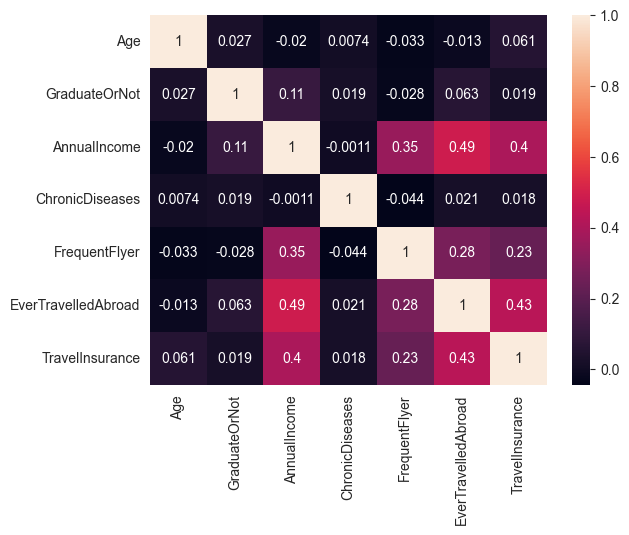

In [10]:
sns.heatmap(df.corr(), annot=True)

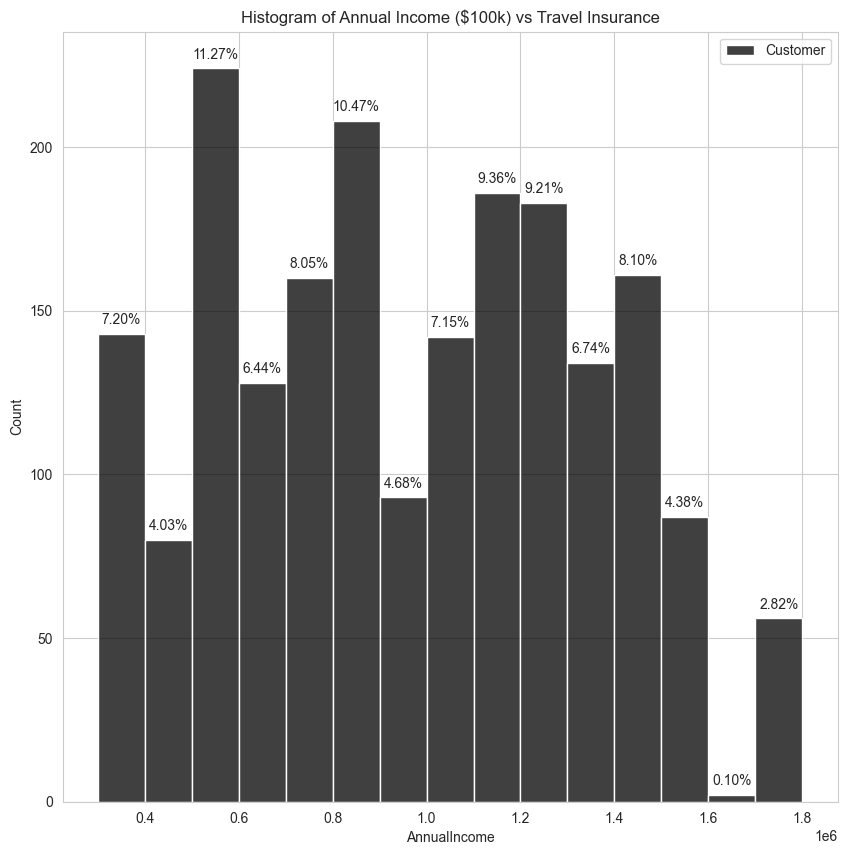

In [11]:
plt.figure(figsize=(10,10))
fig = sns.histplot(data=df, x='AnnualIncome', kde = False, color = 'black')
fig.set_title('Histogram of Annual Income ($100k) vs Travel Insurance')

#  change legend to show Customer and Non-Customer

fig.legend(labels=['Customer', 'Non-Customer'])
# Add text on the bars that show the proportion of customers and non-customers in the specific bin
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/len(df)),
            ha="center") 
# Set one color to be more visible in the plot
plt.show()


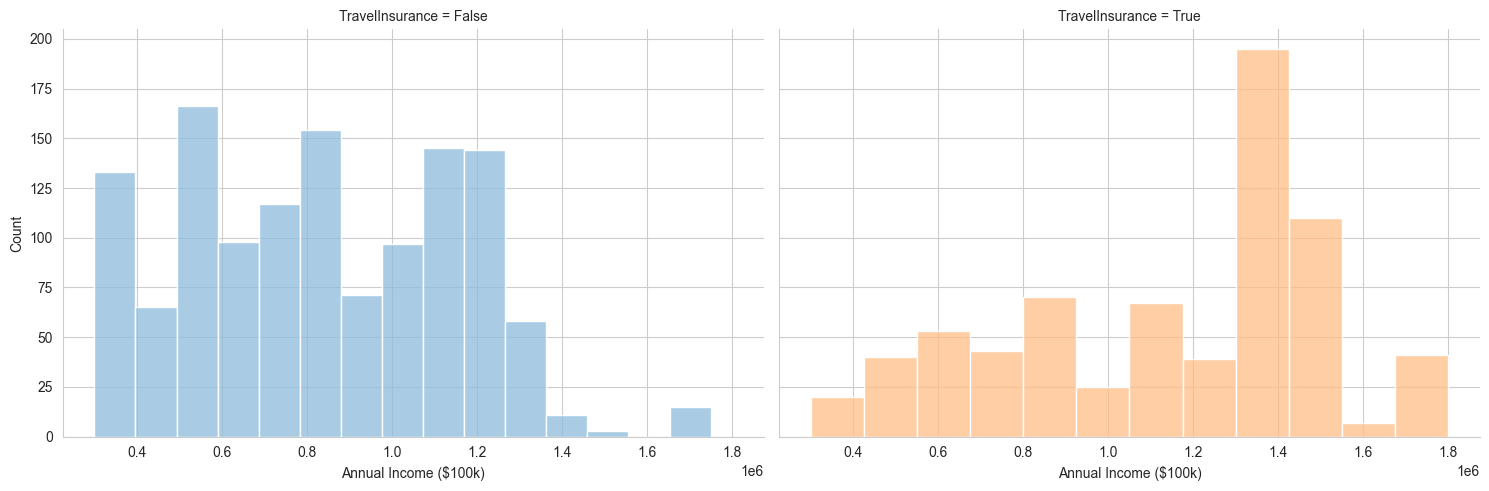

In [35]:
d = {'color': ['#8cbcdc', '#ffbe86']}

g = sns.FacetGrid(df , col = 'TravelInsurance', height = 5, aspect = 1.5, hue_kws = d, hue = 'TravelInsurance')
g.map(sns.histplot, 'AnnualIncome', kde = False)

g.set_axis_labels('Annual Income ($100k)')
g.despine()

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

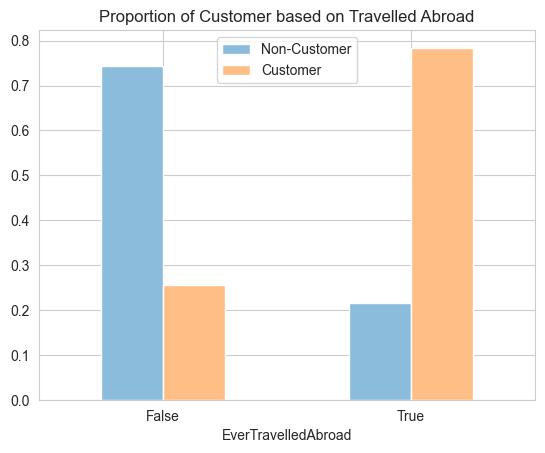

In [13]:

fig = df.groupby('EverTravelledAbroad')['TravelInsurance'].value_counts(normalize=True).unstack().plot(kind='bar',color = ['#8cbcdc', '#ffbe86'])
fig.legend(labels=['Non-Customer', 'Customer'])
plt.title(label='Proportion of Customer based on Travelled Abroad')
plt.xticks(rotation = 0)

(array([0, 1]),
 [Text(0, 0, 'Government Sector'), Text(1, 0, 'Private Sector/Self Employed')])

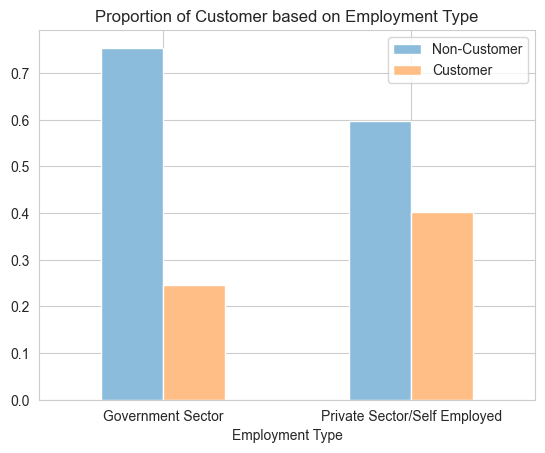

In [14]:

fig = df.groupby('Employment Type')['TravelInsurance'].value_counts(normalize=True).unstack().plot(kind='bar',color = ['#8cbcdc', '#ffbe86'])
fig.legend(labels=['Non-Customer', 'Customer'])
plt.title(label='Proportion of Customer based on Employment Type')
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Travel Insurance Customer Proportion')

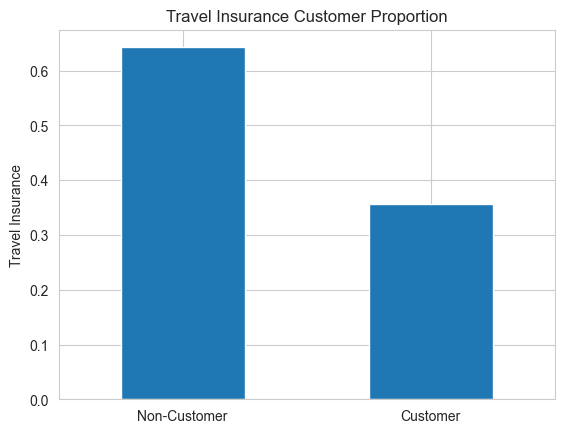

In [15]:
#  change legend to show Customer and Non-Customer and add title 
fig = df['TravelInsurance'].value_counts(normalize=True).plot(kind='bar')
fig.set_ylabel('Travel Insurance')
fig.set_xticklabels(labels=['Non-Customer', 'Customer'], rotation=0)
fig.set_title(label='Travel Insurance Customer Proportion')